**Data preprocessing**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("spam.tsv", sep="\t") # Use 'sep' to specify the delimiter

In [50]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


**we have any missing record or not !**

In [51]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [52]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [53]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


**how many ham and and how many spam !**

In [54]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

**we have very much imbalance dataset!**

In [55]:
df["label"].value_counts()/len(df)

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

**how we can make the data set balance !**

**to get the absolute numbers **

In [56]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [57]:
ham = df[df["label"]== "ham"]
spam = df[df["label"]== "spam"]


In [58]:
ham.shape , spam.shape

((4825, 4), (747, 4))

Before Sampling:

Spam Emails: 100
Non-Spam Emails (Ham): 500
After Sampling:

ham = ham.sample(100): Randomly selects 100 non-spam emails from the original 500.
Now, both datasets have 100 examples each (spam and non-spam), which helps balance the training data.

In [59]:
ham =ham.sample(spam.shape[0])

In [60]:
ham.shape , spam.shape

((747, 4), (747, 4))

**append ham message into spam message**

In [61]:
# Concatenate the DataFrames using pd.concat
data = pd.concat([ham, spam], ignore_index=True)

In [62]:
data.shape

(1494, 4)

In [63]:
data["label"].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [64]:
data.head()

,label,message,length,punct
0,ham,"Gumby's has a special where a &lt;#&gt; "" che...",95,9
1,ham,Dont know supports ass and srt i thnk. I think...,75,1
2,ham,"I have 2 sleeping bags, 1 blanket and paper an...",78,3
3,ham,U free on sat rite? U wan 2 watch infernal aff...,77,2
4,ham,"My fri ah... Okie lor,goin 4 my drivin den go ...",65,7


**create one dimantional histogram **

<function matplotlib.pyplot.show(close=None, block=None)>

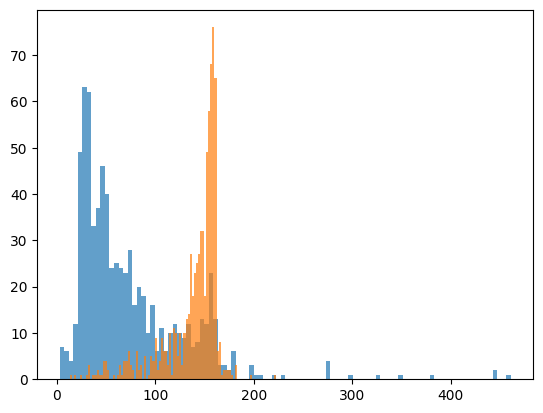

In [65]:
plt.hist(data[data["label"]== "ham"]["length"] , bins =100 ,alpha =0.7)
plt.hist(data[data["label"]== "spam"]["length"] , bins =100 ,alpha =0.7)
plt.show

This selects the "length" column from the filtered DataFrame. Essentially, it extracts the "length" values for rows where the "label" is "ham".Overlaying Multiple Plots: When you have multiple histograms or plots on the same graph, using transparency helps you see overlaps and distinguish between different datasets.

higher length message have high probability to belong to spam

<function matplotlib.pyplot.show(close=None, block=None)>

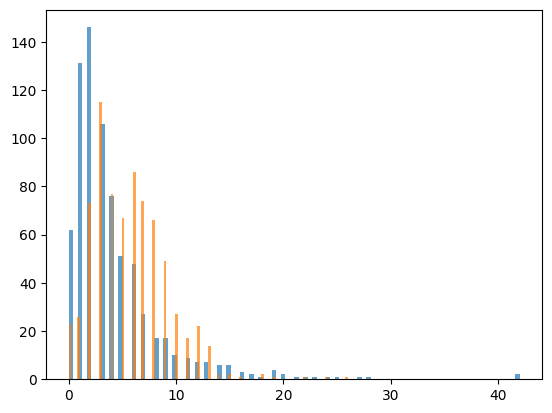

In [66]:
plt.hist(data[data["label"]== "ham"]["punct"] , bins =100 ,alpha =0.7)
plt.hist(data[data["label"]== "spam"]["punct"] , bins =100 ,alpha =0.7)
plt.show

to know how good your model is we have to split the data into training data set and test data set

In [67]:
data

,label,message,length,punct
0,ham,"Gumby's has a special where a &lt;#&gt; "" che...",95,9
1,ham,Dont know supports ass and srt i thnk. I think...,75,1
2,ham,"I have 2 sleeping bags, 1 blanket and paper an...",78,3
3,ham,U free on sat rite? U wan 2 watch infernal aff...,77,2
4,ham,"My fri ah... Okie lor,goin 4 my drivin den go ...",65,7
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


we do 70 percent of data in train packet and 70 percent of data in to test packet

In [68]:
from sklearn.model_selection import train_test_split

train_test_split: This is a specific function within the model_selection module. It splits your dataset into two parts: one part for training your machine learning model and another part for testing it.

In [69]:
x_train ,x_test ,y_train ,y_test = train_test_split(data["message"],data["label"], test_size = 0.3 , random_state =0, shuffle =True)


data["message"]:

data is likely a DataFrame (a table-like structure) from a library like pandas.
data["message"] extracts the "message" column from this DataFrame. This column contains the input data (features) that you want to use to train and test your model.
data["label"]:

Similar to data["message"], data["label"] extracts the "label" column from the DataFrame. This column contains the output data (labels) that you want your model to predict.

shuffle=True:

Purpose: Ensures that the data is mixed up randomly before splitting it into training and testing sets.
Why It Matters: Helps prevent any biases that could arise if the data has a specific order (like all spam messages grouped together).
random_state=0:

Purpose: Ensures that the random shuffling and splitting of the data is reproducible.
Why It Matters: When you set random_state to a fixed number (like 0), you'll get the same random split every time you run your code. This is useful for consistency in testing different models or comparing results with others.

In [70]:
1494 *0.3

448.2

In [71]:
x_train.shape

(1045,)

In [72]:
y_test.shape

(449,)

**building the model **

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

**pipeline :It allows you to combine multiple steps, such as data preprocessing, feature extraction, and model training, into a single, cohesive process. This makes it easier to manage and automate machine learning workflows.**

In [74]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

Step 1: "tfidf" using TfidfVectorizer():
This step transforms raw text data (like sentences or documents) into a format that a machine learning model can understand (numbers).
It converts words into numbers based on their importance in the text.
Step 2: "classifie" using RandomForestClassifier(n_estimators=10):
This step uses a machine learning model called Random Forest to make predictions.
n_estimators=10 means the Random Forest will use 10 decision trees to make its predictions.

In [75]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

x_train:

This is your training data, which contains the input features (in this case, the text data) that the model will learn from.
y_train:

This is the corresponding labels for your training data, which are the correct answers or outcomes (like whether an email is spam or not spam).

**predicting the model **

In [76]:
y_pred= classifier.predict(x_test)

In [77]:
y_test , y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

x_test: The data you give to the model to make predictions. It's the input features.
y_test: The actual labels or correct answers for the data in x_test. It's the output or target.

In [78]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

from sklearn.metrics import classification_report:

What it does: classification_report is a function that generates a report showing the main classification metrics.
Usage: After making predictions with your model, you can use classification_report to see metrics like precision, recall, and F1-score for each class.
Example: If you're classifying emails as spam or not spam, this report tells you how well your model performed in distinguishing between the two.
from sklearn.metrics import accuracy_score:

What it does: accuracy_score is a function that calculates the accuracy of your model's predictions.
Usage: You can use accuracy_score to see how often your model correctly predicted the labels (compared to y_test).
Example: If your model predicted 80 out of 100 emails correctly, the accuracy score would be 80%.
from sklearn.metrics import confusion_matrix:

What it does: confusion_matrix is a function that creates a table showing counts of actual versus predicted labels.
Usage: It helps you understand where your model is making mistakes by showing how many times it confused one class for another.
Example: The confusion matrix might show that your model incorrectly classified 10 spam emails as not spam (false negatives).

In [79]:
accuracy_score(y_test , y_pred)

0.9465478841870824

In [80]:
confusion_matrix(y_test , y_pred)

array([[226,   1],
       [ 23, 199]])

In [81]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



Builiding the model (SVM)

In [82]:
from sklearn.svm import SVC


In [83]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100 , gamma ="auto"))])

High C: The teacher demands that every question be answered correctly. This might cause students to memorize answers, potentially losing the ability to apply knowledge broadly.
Low C: The teacher is more lenient, allowing for some mistakes. This approach encourages students to understand concepts rather than just memorizing answers.
And gamma is like the size of a flashlight's beam:

High Gamma: The flashlight has a narrow beam, focusing sharply on nearby objects. This might mean overfitting to the specifics of the training data.
Low Gamma: The flashlight has a wider beam, illuminating a larger area. This allows for a broader understanding and generalization.

In [85]:
svm.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

fit() is a method used in scikit-learn to train (or fit) a model with training data.
x_train: This is your training data, which consists of input features (like text or numerical data) that the model will learn from.
y_train: These are the correct labels or outcomes corresponding to x_train. The model learns to associate the input features in x_train with these labels.

In [86]:
y_pred= svm.predict(x_test)

In [87]:
accuracy_score(y_test , y_pred)

0.9376391982182628

In [88]:
confusion_matrix(y_test , y_pred)

array([[221,   6],
       [ 22, 200]])

In [89]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94       227
        spam       0.97      0.90      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



**Hand craft created dataset **

In [90]:
test1 =["Hello , you are learning natural language processing"]
test2 = ["Hope you are doing good and learning new things"]
test3 = ["Congraduations , You won a lottery ticket worth $1 Million  ! To claim call on 446677"]

In [92]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [93]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
